In [1]:
import pandas as pd
import seaborn as sns;

In [2]:
airbnd = pd.read_csv("AB_NYC_2019.csv")

## Wie viel sind die Leute bereit zu zahlen für AirBnbs die öfter bewertet wurden?

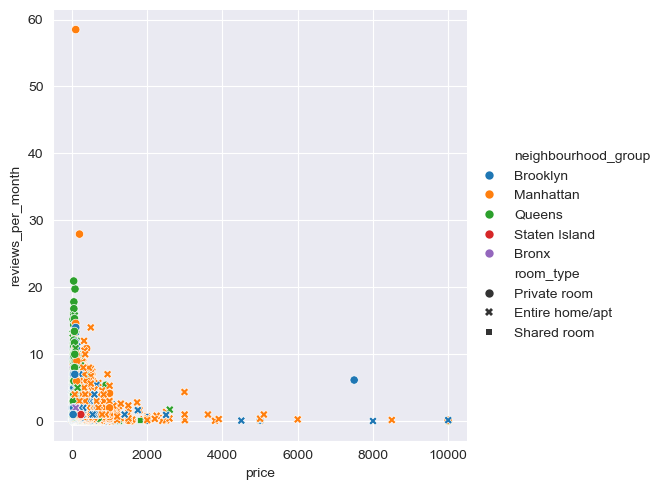

In [32]:
sns.relplot(data=airbnd, x="price", y="reviews_per_month", hue="neighbourhood_group", style="room_type")

##  

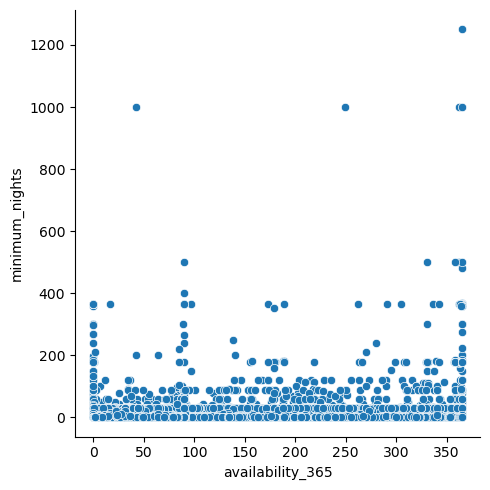

In [10]:
sns.relplot(data=airbnd, x="availability_365", y="minimum_nights")

## Wie viele Räume von welchen Typen gibt es in den jeweiligen Nachbarschaften?

<Axes: xlabel='neighbourhood_group', ylabel='Count'>

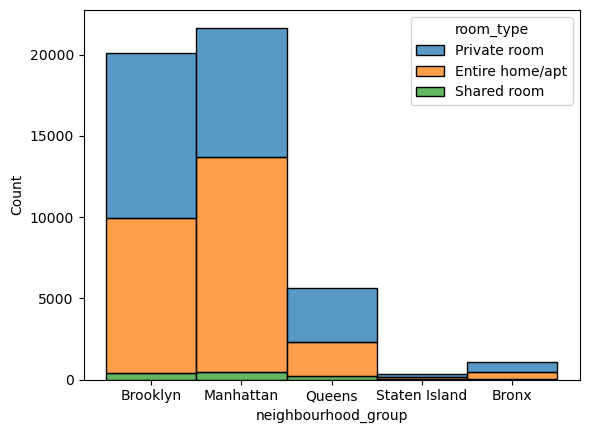

In [29]:
sns.histplot(data=airbnd, x="neighbourhood_group", multiple="stack", hue="room_type")

## Wie viel kostet ein Raumtyp im durchscnitt?

<Axes: xlabel='price'>

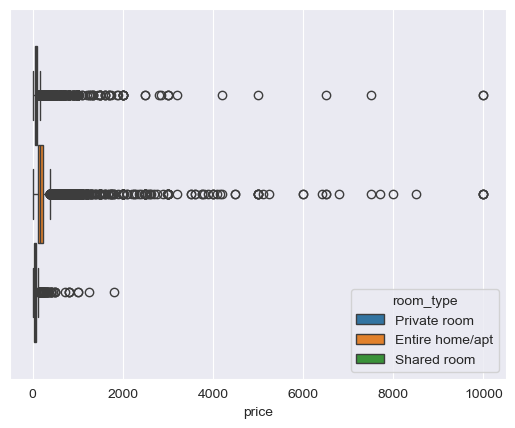

In [45]:
sns.boxplot(data=airbnd, x="price", hue="room_type", )

## Wie viele verschiedene AirBnbs vermietet ein Vermieter und um wie viel vermietet er diese?

<Axes: xlabel='calculated_host_listings_count', ylabel='price'>

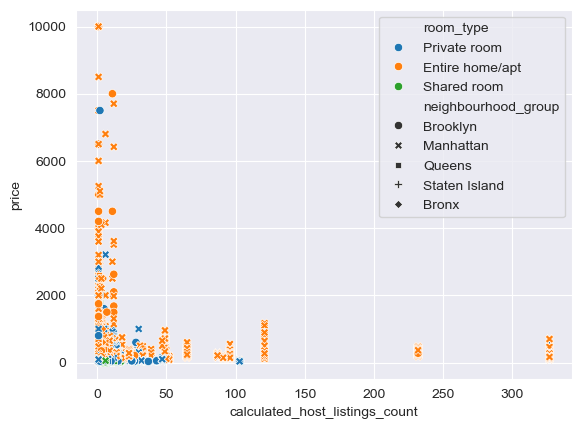

In [44]:
sns.scatterplot(data=airbnd, x="calculated_host_listings_count", y="price", style="neighbourhood_group", hue="room_type")

## Wie viele Nächte muss man ein Raumtyp mindestens mieten?

C:\Users\Frauenwieser\AppData\Local\Temp\ipykernel_10076\1288904111.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=airbnd, x=airbnd["minimum_nights"][:100], hue="room_type", multiple="stack")


<Axes: xlabel='minimum_nights', ylabel='Density'>

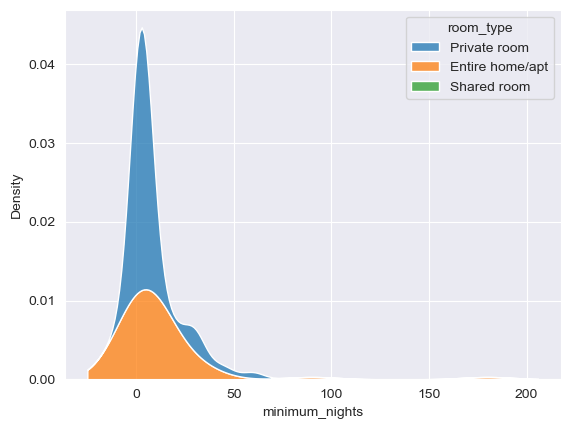

In [46]:
sns.kdeplot(data=airbnd, x=airbnd["minimum_nights"][:100], hue="room_type", multiple="stack")

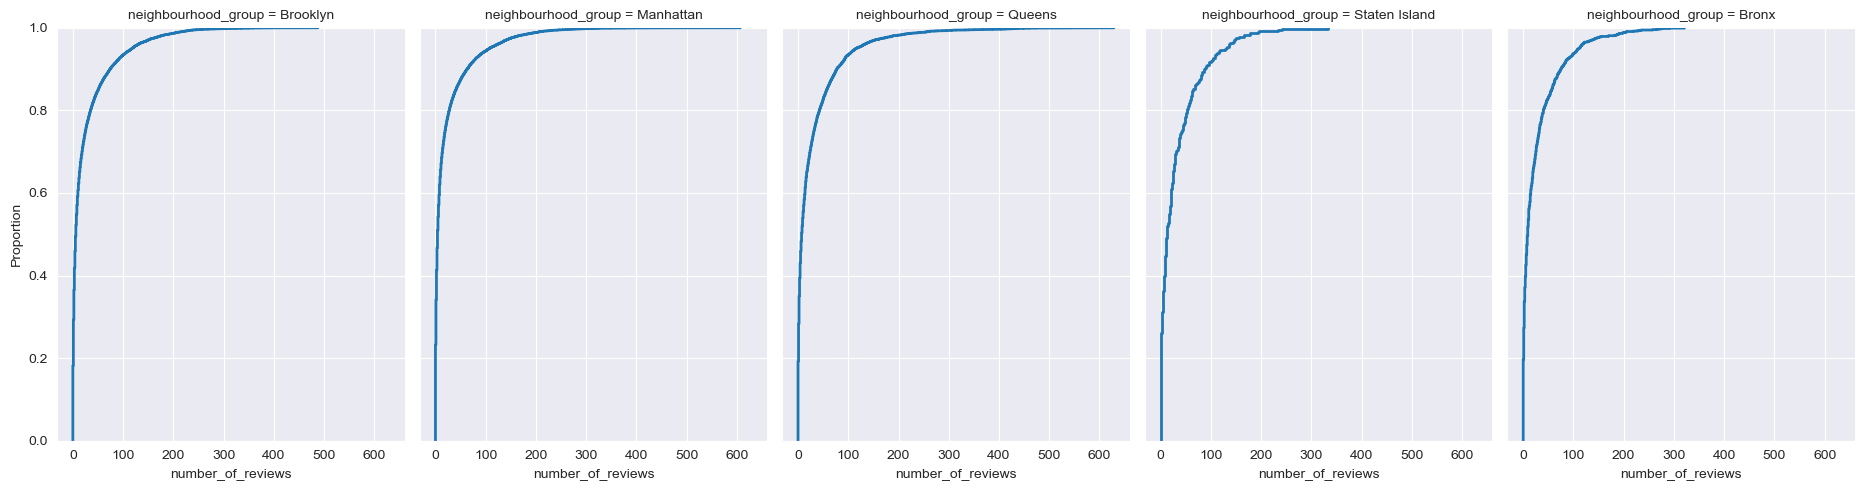

In [47]:
sns.displot(data=airbnd, x="number_of_reviews", col="neighbourhood_group",
            kind="ecdf", aspect=.75, linewidth=2)

## Wie viele Nächte muss man ein Raumtyp mindestens mieten?

<Axes: xlabel='minimum_nights', ylabel='room_type'>

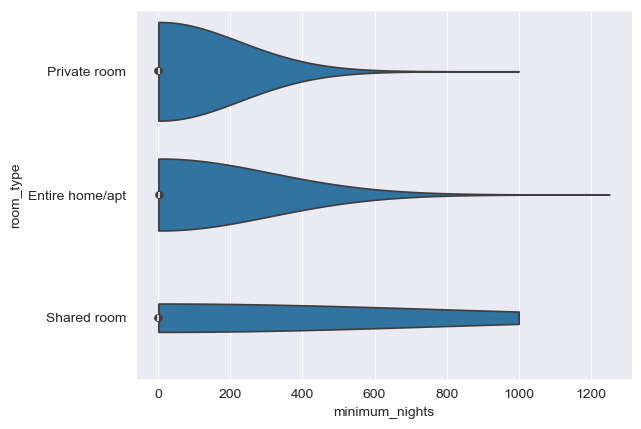

In [42]:
sns.violinplot(data=airbnd, x="minimum_nights", y="room_type", bw_adjust=100, cut=0)

## Wie viel kostet ein AirBnb in einer bestimmten Nacbraschaftsgruppe?

<Axes: xlabel='price', ylabel='neighbourhood_group'>

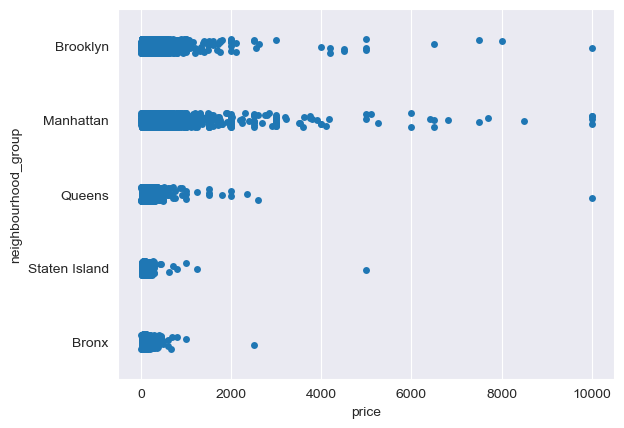

In [40]:
sns.stripplot(data=airbnd, x="price", y="neighbourhood_group")

## Wie viel haben die Nutzer von Airbnb durchschnittlich im Jahr ausgegeben?

<Axes: xlabel='year'>

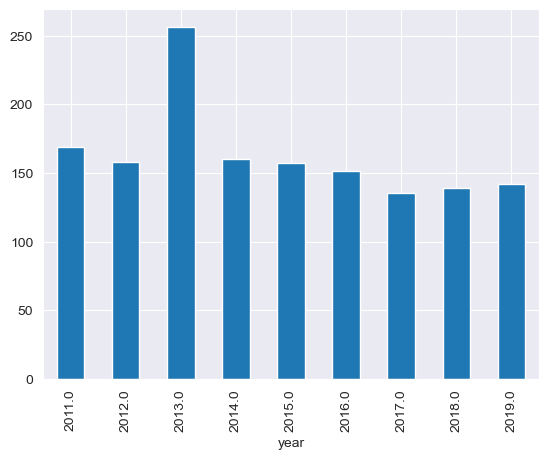

In [4]:
x = pd.DataFrame(airbnd)
x["last_review"] = pd.to_datetime(airbnd["last_review"])
x["year"] = x["last_review"].dt.year
avg_price_year = x.groupby("year")["price"].mean()

avg_price_year.plot(kind="bar", x="year", y="price")

## Was sind die beliebtesten Stadtteile und deren beslitester Raum Typ?

<Axes: xlabel='neighbourhood_group', ylabel='number_of_reviews'>

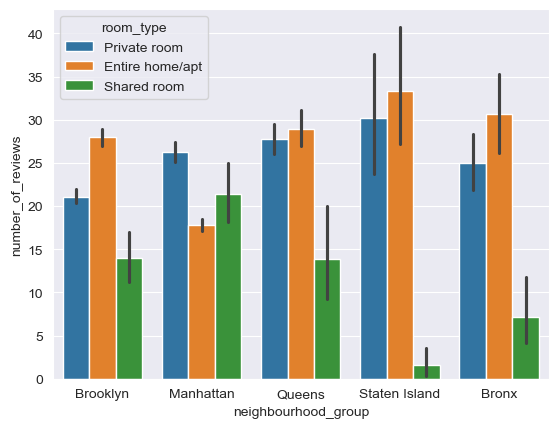

In [7]:
sns.barplot(airbnd, x="neighbourhood_group", y="number_of_reviews", hue="room_type")

## Wie schaut die Verteilung der Verfügbarkeit aus?

<Axes: xlabel='calculated_host_listings_count', ylabel='availability_365'>

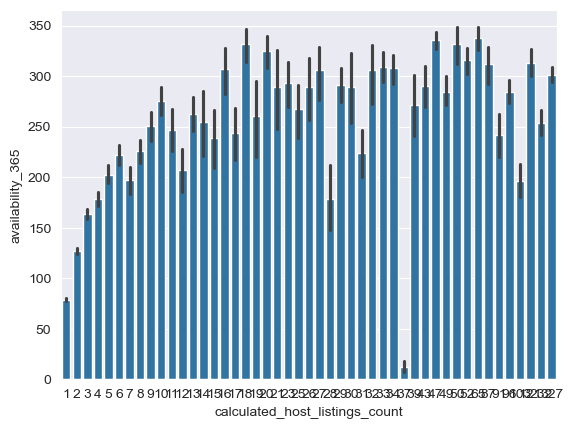

In [43]:
sns.barplot(data=airbnd, y="availability_365", x="calculated_host_listings_count")

## Wer ist der beste Gastgeber?

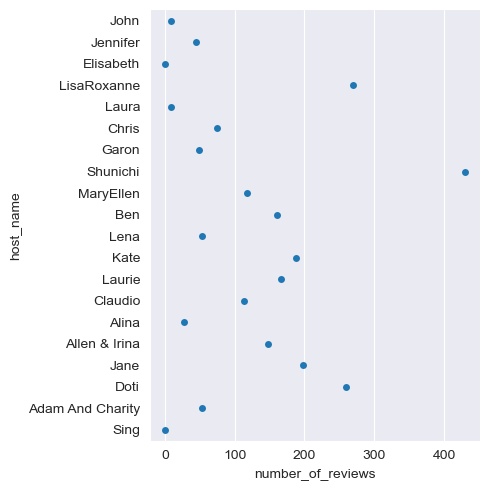

In [33]:
sns.catplot(data=airbnd, x="number_of_reviews", y=airbnd["host_name"][:20])

# Models

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv("AB_NYC_2019.csv")

In [9]:
data.sample(5)

id                                               name    host_id  \
5615    4084603                       Prime East Village 1 Bedroom    7861502   
29713  22830508                          Williamsburg Garden Oasis  168159627   
34419  27292944  Cozy duplex in Redhook, Brooklyn\r\n(entire ba...    8593113   
40267  31224656                         Private Room with Backyard    4281300   
1664     753991                 Elegant Stuyvesant Heights Retreat    1884204   

      host_name neighbourhood_group       neighbourhood  latitude  longitude  \
5615      Aviad           Manhattan        East Village  40.72878  -73.98521   
29713     Holly            Brooklyn        Williamsburg  40.72017  -73.95977   
34419     Salem            Brooklyn            Red Hook  40.67349  -74.00589   
40267      Alex            Brooklyn        Williamsburg  40.71602  -73.94189   
1664       Mark            Brooklyn  Bedford-Stuyvesant  40.68522  -73.93557   

             room_type  price  minimum_nights  number_of_reviews last_review  \
5615   Entire home/apt    200               1                  1  2015-05-24   
29713  Entire home/apt    600               2                 26  2019-05-09   
34419     Private room     81               1                  7  2019-05-17   
40267     Private room    119               1                  0         NaN   
1664   Entire home/apt    105               5                227  2019-07-03   

       reviews_per_month  calculated_host_listings_count  availability_365  
5615                0.02                               1                 0  
29713               1.59                               1               253  
34419               0.66                               2                48  
40267                NaN                               3                 0  
1664                2.79                               2               234

### Data cleaning

In [3]:
data = data.drop(columns=["last_review", "id", "name", "longitude", "latitude", "host_name", "host_id"])

In [4]:
data["reviews_per_month"].fillna(0, inplace=True)

In [5]:
neighborhood_count = data['neighbourhood'].value_counts()
filter_neighbor = neighborhood_count[neighborhood_count <= 11].index
data.loc[data['neighbourhood'].isin(filter_neighbor), "neighbourhood"] = "Other"


print (len(filter_neighbor))

65


In [6]:
data = pd.get_dummies(data= data, columns=["neighbourhood_group", "room_type", "neighbourhood"])

data.sample(100)


price  minimum_nights  number_of_reviews  reviews_per_month  \
36801     65               2                 27               3.24   
43386    219               1                  0               0.00   
22767     35               1                  0               0.00   
18510    225               5                 18               0.58   
23098    180               2                 36               1.40   
...      ...             ...                ...                ...   
5097     250               2                  6               0.11   
33125     85               2                 68               5.37   
12068    285              31                  5               0.12   
47790     40               1                  1               1.00   
15517    130               3                 44               1.15   

       calculated_host_listings_count  availability_365  \
36801                               2                59   
43386                               1               362   
22767                               1                 0   
18510                               2                96   
23098                               1                 2   
...                               ...               ...   
5097                                1                 0   
33125                               1               247   
12068                               1               365   
47790                               3               179   
15517                               1                80   

       neighbourhood_group_Bronx  neighbourhood_group_Brooklyn  \
36801                      False                         False   
43386                      False                         False   
22767                      False                         False   
18510                      False                         False   
23098                      False                         False   
...                          ...                           ...   
5097                       False                         False   
33125                       True                         False   
12068                      False                         False   
47790                       True                         False   
15517                      False                         False   

       neighbourhood_group_Manhattan  neighbourhood_group_Queens  ...  \
36801                          False                        True  ...   
43386                           True                       False  ...   
22767                           True                       False  ...   
18510                           True                       False  ...   
23098                           True                       False  ...   
...                              ...                         ...  ...   
5097                            True                       False  ...   
33125                          False                       False  ...   
12068                           True                       False  ...   
47790                          False                       False  ...   
15517                           True                       False  ...   

       neighbourhood_Vinegar Hill  neighbourhood_Wakefield  \
36801                       False                    False   
43386                       False                    False   
22767                       False                    False   
18510                       False                    False   
23098                       False                    False   
...                           ...                      ...   
5097                        False                    False   
33125                       False                    False   
12068                       False                    False   
47790                       False                    False   
15517                       False                    False   

       neighbourhood_Washington Heights  n

In [42]:
data[data['neighbourhood'] == "Other"].count()

id                                378
name                              378
host_id                           378
host_name                         378
neighbourhood_group               378
neighbourhood                     378
latitude                          378
longitude                         378
room_type                         378
price                             378
minimum_nights                    378
number_of_reviews                 378
last_review                       296
reviews_per_month                 296
calculated_host_listings_count    378
availability_365                  378
dtype: int64

In [66]:
data.nunique()

price                             674
minimum_nights                    109
number_of_reviews                 394
reviews_per_month                 938
calculated_host_listings_count     47
                                 ... 
neighbourhood_Williamsbridge        2
neighbourhood_Williamsburg          2
neighbourhood_Windsor Terrace       2
neighbourhood_Woodhaven             2
neighbourhood_Woodside              2
Length: 171, dtype: int64

### Training

In [7]:
X = data.drop(columns='availability_365')
y = data.availability_365

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.25, random_state=42)

In [1]:
logistic = GridSearchCV(LogisticRegression(), param_grid={'solver': ['newton-cg', 'lbfgs', 'newton-cholesky'],
                                                         'C': [0.1, 1, 10],
                                                         'class_weight': [None, 'balanced']},
                        scoring='precision',
                        verbose=0,
                        cv=3,
                        n_jobs=-1)
logistic.fit(X_train, y_train)
logistic.score(X_test, y_test)

predict = logistic.predict(X_test)
error = mean_squared_error(y_test, predict)

confusion_matrix(y_test, logistic.predict(X_test))

NameError: name 'scaler' is not defined

In [10]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

0.33401505235602097

In [11]:
confusion_matrix(y_test, forest.predict(X_test))

array([[3875,   10,   10, ...,    6,    6,   24],
       [  69,    0,    0, ...,    0,    1,    0],
       [  44,    3,    0, ...,    1,    0,    1],
       ...,
       [  29,    0,    0, ...,    3,    4,    3],
       [  63,    1,    0, ...,    1,   20,   11],
       [ 146,    0,    0, ...,    3,    8,   72]], dtype=int64)

In [ ]:
data.availability_365.describe()

In [13]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

predict_new = log_reg.predict(X_test)
error_new = mean_squared_error(y_test, predict_new)

print(predict_new)
print(error_new)
confusion_matrix(y_test, predicted_labels)

[0 0 0 ... 0 0 0]
27107.74214659686


C:\Users\Frauenwieser\miniconda3\envs\dsai\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[3862,    8,    9, ...,    6,   11,   26],
       [  70,    0,    0, ...,    0,    1,    0],
       [  42,    4,    0, ...,    1,    0,    1],
       ...,
       [  30,    0,    0, ...,    2,    3,    2],
       [  61,    1,    0, ...,    2,   22,   12],
       [ 140,    0,    0, ...,    4,    7,   77]], dtype=int64)

In [ ]:
logistic = GridSearchCV(LogisticRegression(), param_grid={'solver': ['newton-cg', 'lbfgs', 'newton-cholesky'],
                                                          'C': [0.1, 1, 10],
                                                          'class_weight': [None, 'balanced']},

                        verbose=0,
                        cv=4,
                        n_jobs=-1,
                        #n_iter_i=-1
                        )
logistic.fit(X_train, y_train)
logistic.score(X_test, y_test)

predict = logistic.predict(X_test)
error = mean_squared_error(y_test, predict)

confusion_matrix(y_test, logistic.predict(X_test))